**R stats for psychology**
_______________________________________________________

This script is a personal effort to summarise the use of R as well as to provide an structure for the analysis of a data set framed in the field of social science and in particular in psychology. This first section only discusses introduction to some of the functionalities of R. From the [Descriptive Statistics](#descsta) we provide several examples on how to use different statistical techniques.

**Table of Contents** 

1. [Workspace Commands](#workspace)

    1.1. [Packages](#pack)
    
    1.2. [Types of variables](#vartype)
    
    1.3. [Operations with variables](#opvar)
    
    
2. [Data Management](#dataman)

    2.1. [Loading a data set](#loaddat)
    
    2.2. [Creating a data set](#credat)
    
    2.3. [Accessing a data set](#accdat)
    
    2.4. [Manipulating a data set](#manidat)
    
    2.5. [Cleaning a data set](#cleandat)
    
    
3. [Descriptive Statistics](#descsta)

    3.1. [Univariate Analyses](#descuni)
    
    3.2. [Test of Normality](#normality)

<a id="workspace"></a>
# Workspace Commands

In order to start working with R you first need to prepare the working environment, this involves installing/loading the packages that will be required by the analyses you want to perform; sometimes it also involves specifying what will be the encoding of your script, whether to turn off the scientific notation when getting an output among others such as set the CRAN repository from which you would desire to download the packages, etc.

In [3]:
.libPaths("/Users/williamcruz/Documents/R Packages") # change the name accordingly to your packages folder
r <- getOption("repos")
r["CRAN"] <- "http://cran.csie.ntu.edu.tw/"          # set repository to a National Repository in your country
options(repos=r)
x <- c('ggplot2','openxlsx','plyr')                  # a list of packages to be used
packages <- as.data.frame(installed.packages())      # List of currently installed packages

for (i in 1:length(x)) {
  if(x[i] %in% packages$Package == TRUE){
    library(x[i],character.only = TRUE)  
  }else if(x[i] %in% packages$Package == FALSE){
    install.packages(as.character(x[i]))
    library(x[i],character.only = TRUE)  
  }
}

options(scipen = 99)                             # turn off scientific notation (optional)
options(encoding = "UTF-8")                      # Select the encoding of the files, not absolutely required
rm(list=ls())                                    # Erasing all objects from the current work environment
cat("\014")                                      # Erasing previous commands from the console

Some other workspace commands are as follows

In [ ]:
getwd()                                          # print the current working directory - cwd
setwd('a valid directory path')                  # set the working directory to the specified path

ls()                                             # list the objects in the current workspace
ls(pat = "m")                                    # list the objects that have in their name a given pattern
ls(pat = "^m")                                   # Lists objects whose name start with m
ls.str(pat= "M", max.level=-1)                   # Reduces the level of information
ls.str()                                         # Display some details of the objects in memory
rm(list=ls())                                    # Erasing all objects from the current work environment

m <- as.data.frame(list.files(),stringsAsFactors = FALSE) # make a data frame out of the files names in the current wd
m$index <- as.numeric(m$'list.files()' == 'x')   # Procedure to check whether a file exist or not in the current wd
dir()                                            # Produce a vector of the file names in the current wd
dir("name of directory")                         # allows to choose one file within the cwd

help(options)                                    # learn about available options
help('bs') | help('bs', package = 'splines')     # Search info about the funcion bs
apropos('lm')                                    # Finds all functions which name contains the character string given as measure
options()                                        # view current option settings
options(digits=3)                                # number of digits to print on output

history()                                        # display last 25 commands
history(max,show=Inf)                            # display all previous commands

savehistory(file="myfile")                       # default is ".Rhistory"
loadhistory(file= "myfile")                      # default is ".Rhistory"

save.image()                                     # save the workspace to the file .RData in the cwd
save(x, file="myfile,RData")                     # save specific objects to a file
n <- list(MP=MP,MP.original=MP.original)         
save(n, file= "myfile.RData")                    # save specific objects to a file
load("myfile.RData")                             # load a workspace into the current session
q()                                              # quit R. You will be prompted to save the workspace

rm(x)                                            # Deletes the object x
rm(x,y)                                          # Deletes both objects x and y
rm(list=ls())                                    # Deletes all objects in memory
rm(list=ls(pat= "^m"))                           # Deletes selectively some objects

?lm                                              # How the linear model function works
help(lm)                                         # Same as above
help("lm")                                       # Same as above
help(lm, try.all.packages=TRUE)                  # allows to search in all packages
help("bs", package = "splines")                  # Display help pages from a package not loaded in memory
help.start()                                     # A search with keywords is possible with this html help
help.start("tree", rebuild=TRUE)                 # refresh the database used
apropos("help")                                  # finds all functions which name contains the given character string

.libPaths("/Users/williamcruz/Documents/R Packages")
r <- getOption("repos")
r["CRAN"] <- "https://www.icesi.edu.co/CRAN/"    # Repository used in Colombia
r["CRAN"] <- "http://cran.csie.ntu.edu.tw/"      # Repository used in Taiwan
options(repos=r)

<a href="pack"></a>
## Packages

This section introduces some of the commands that are related with R packages

In [ ]:
x<-c("agricolae","base","boot","class","cluster","codetools","compiler","datasets","foreign",
     "ggplot2","gmodels","graphics","grDevices","grid","HSAUR2","KernSmooth",
     "lattice","MASS","Matrix","methods","mgcv","nlme","nnet","parallel","plyr",
     "psych","rpart","spatial","splines","stats","stats4","survival","tcltk",
     "tools","utils","openxlsx","plyr")          # Asort the name of the packages in a vector

for (i in 1:length(x)) {                         # Install the packages that were listed in the x vector in certain directory
  install.packages(x[i],lib = ('directory/'))   
}
for (i in 1:length(x)) {                         # Load the packages that were listed, these have to be installed already
  library(x[i],character.only = TRUE)
}
library('agricolae')                             # Load a single package into the current wd
remove.packages('agricolae')                     # Removes single package from the folder of packages
install.packages()                               # Generates a list of the currently installed packages
update.packages()                                # updates the currently installed packages 
.libPaths()                                      # Generates the current path were packages are saved

k<-as.data.frame(installed.packages(),stringsAsFactors = FALSE)  # consult installed packages as a data frame

<a id="vartype"></a>
## Types of variables

This section introduces the types of variables that can be used within the R environment

In [ ]:
x<- 3                                            # integer
x<- -0.5                                         # decimal
A<- "Hello"                                      # string or character
X<- c(1,2,3,4,5)                                 # vector
Y<- -1:5                                         # vector
Z<- seq(1,9,2)                                 	 # vector
V1<-matrix(1:6, nrow=2, ncol=3)                  # matrix
V1<-matrix(1:6, nrow=2, ncol=3, byrow=TRUE)      # matrix
X<-matrix(NA,3,3)                                # matrix
v1<-matrix(c (3.8778, 2.8110, 3.1480, 3.5062, 
              2.8110, 2.1210, 2.2669, 2.5690,
              3.1480, 2.2669, 2.6550, 2.8341,
              3.5062, 2.5690, 2.8341, 3.2352), nrow=4,ncol=4)
V3<-array(1:12,c(2,2,3))                         # array
V4<-V3[2,2,2]                                    # choosing a value from an array

<a id="opvar"></a>
## Operations with variables

Some of the operations that R can perform with the variables created within the working environment are as follow

In [ ]:
Z<-seq(1,9,2)                                    # Sequence
G<-rep(1:3,3)                                    # Repetition
G1<-rep(1:3,each=3)

Y1<-c(1,2,3)
Y2<-c(4,5,6)
Y3<-c(7,8,9)
Y<-cbind(Y1,Y2,Y3)                               # bind by column
X<-rbind(Y1,Y2,Y3)                               # bind by row

<a id="dataman"></a>
# Data Management

<a id="loaddat"></a>
## Loading a data set

Loading a data set in the R working environment can be done in many different ways, depending on the properties and source of such data

### Loading a data set from .csv

In [ ]:
dbname <- "Name of your data base.csv"          # Object with the name of the .csv file
db <- read.csv(as.character(dbname), header=TRUE) # open a data set from a .csv file
db <- read.csv(as.character(dbname), header=TRUE, sep = ",", stringsAsFactors = FALSE) # aditional commands
write.csv(j,'Name of file.txt',row.names = FALSE) # writes a data set/object in a .txt file

### Loading a data set from clipboard

In [ ]:
read.clipboard()                                # To use this function you need library("psych")
my.data<-read.clipboard(header=TRUE)
my.data<-read.clipboard(sep= "\t")
my.tab.data<-read.clipboard.tab()
read.clipboard.csv                              # In case the data is a csv in the clipboard
read.clipboard.tab                              # In case the data is tab separated in the clipboard
read.clipboard.fwf                              # In case the data is fixed width fields
my.data<-read.clipboard.fwf(widths=c(5,rep(1,5),rep(3,4)))

### Loading a data set from Excel file

In [ ]:
library('openxlsx')                             # Load the library, there are several libraries to do this!!
dbname <- "Name_of_your_file.xlsx"              # Object with the name of the .xlsx file you need library('openxlsx')
db     <- read.xlsx(dbname, sheet = 1)          # Read the sheet 1 of the dbname file
# # Write an excel file
wb     <- createWorkbook()                      # Saves a data set/object in a .xlsx file
addWorksheet(wb,"sheet1")                       # Adds a sheet to the workbook previously created 
writeData(wb,"sheet1",db,startCol = 1, startRow = 1, rowNames = FALSE, colNames = TRUE) # example of writing a db or data frame object
saveWorkbook(wb,"Name_of_your_file.xlsx", overwrite = TRUE) # save the .xlsx file in your current working directory

### Loading a data set from SPSS

In [ ]:
library('foreign')                              # Load the required library to load information from an SPSS formated data set
datafilename <- c('imputado2EM.sav')
db1 <- read.spss(datafilename, use.value.labels = TRUE, to.data.frame = TRUE)

### Loading a data set from R data

In [ ]:
load("XXXX.Rdata")

<a id="credat"></a>
## Creating a data set

This section presents some examples on creating data sets with different properties using `structure` and `data.frame`

Below there are example on how to create data sets manually; the first example shows a data frame of 10 individuals and 7 variables.

In [ ]:
hypo <-structure(list(individual = 1:10,        
                       sex = structure(c(2L, 2L, 2L,2L, 2L, 1L, 1L, 1L, 1L, 1L), 
                                       .Label = c("Female", "Male"), class = "factor"),
                       age = c(21L, 43L, 22L, 86L, 60L, 16L, NA, 43L, 22L, 80L),
                       IQ = c(120L, NA, 135L, 150L, 92L, 130L, 150L, NA, 84L, 70L), 
                       depression = structure(c(2L, 1L, 1L, 1L, 2L, 2L, 2L, 2L,1L, 1L), 
                                              .Label = c("No", "Yes"), class = "factor"), 
                       health = structure(c(3L,3L, 1L, 4L, 2L, 2L, 3L, 1L, 1L, 2L), 
                                          .Label = c("Average","Good", "Very good", "Very poor"), class = "factor"), 
                       weight = c(150L,160L, 135L, 140L, 110L, 110L, 120L, 120L, 105L, 100L)), 
                  .Names = c("individual","sex", "age", "IQ", "depression", "health", "weight"), class = "data.frame", row.names = c(NA, -10L))

measure <-structure(list(V1 = 1:20,               # Manual creation of a data set, this example have the measure of chest, waist and hips for 10 men and women
                         V2 = c(34L, 37L, 38L, 36L, 38L, 43L,40L, 38L, 40L, 41L, 36L, 36L, 34L, 33L, 36L, 37L, 34L, 36L, 38L, 35L), 
                         V3 = c(30L, 32L, 30L, 33L, 29L, 32L, 33L, 30L, 30L, 32L,24L, 25L, 24L, 22L, 26L, 26L, 25L, 26L, 28L, 23L), 
                         V4 = c(32L,37L, 36L, 39L, 33L, 38L, 42L, 40L, 37L, 39L, 35L, 37L, 37L, 34L,38L, 37L, 38L, 37L, 40L, 35L)), 
                    .Names = c("V1", "V2", "V3","V4"), class = "data.frame", row.names = c(NA, -20L))
measure <- measure[,-1]                           # Eliminates the first column of the dataset
names(measure) <- c("chest", "waist", "hips")     # Sets the column names according to the vector provided
measure$gender <- gl(2, 10, labels = c("male", "female"))   # Generate factors by specifying the pattern of their levels

exam <-structure(list(subject = 1:5,              # Manual creation of a data set, this example shows the score of 5 college students on several subjects
                      math = c(60L, 80L, 53L, 85L, 45L), 
                      english = c(70L, 65L, 60L, 79L, 80L), 
                      history = c(75L, 66L,50L, 71L, 80L), 
                      geography = c(58L, 75L, 48L, 77L, 84L), 
                      chemistry = c(53L,70L, 45L, 68L, 44L), 
                      physics = c(42L, 76L, 43L, 79L, 46L)), 
                 .Names = c("subject","maths", "english", "history", "geography", "chemistry", "physics"), 
                 class = "data.frame", row.names = c(NA, -5L))

Another method frequently used to create a data set is to use `data.frame`

In [ ]:
test <- data.frame(list(a = c(1.5,1,0.5), b = c(-0.5,1.5,0), c = c(0.09,0.21,0.30))) 

# Data in two numeric vectors
women_weight <- c(38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5)
men_weight <- c(67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4) 
# Create a data frame
my_data <- data.frame( 
  group = rep(c("Woman", "Man"), each = 9),
  weight = c(women_weight,  men_weight)
)

Instead of creating a data set from scratch there are also several data sets available inside different packages or included within the R environment. In order to explore this I have created a dedicated script which I upload here soon

<a id="accdat"></a>
## Accessing a data set

Here there is a non exhaustive collection of some of the data sets provided by R base or other R packages

In [11]:
mydata <- islands # The are in thousands of square miles of the landmasses which exceed 10.000 square miles

<a id="manidat"></a>
## Manipulating a data set

Below there is a collection of the more frequently used commands for starting to work with a data set

In [ ]:
db<-USairpollution
str(db)                                            # verifying db structure, very useful as a preliminar step
summary(db$popul)
count(db,.(popul))

# # SUBSETTING DATA SETS
db$index<- as.numeric(db$popul >= 717)             # create an index to identify the cases for which the value in one of the columns/variables
                                                   # is equal to a value of interest, this is a preliminary stage to filter a data base according to some criteria
new_db <- subset(db,db$index == 1, select = SO2:predays) # subsets of units (rows) or variables (columns) can be extracted via the subset operator from a data.frame
new_db <- subset(db,db$index == 1, select = c(1:4))
new_db <- db[c(1:10),c('wind','predays')]         # subset of a data frame, 10 first rows and the variables stated
new_db <- db[which(db$temp >= 20 & db$wind >= 9.0),c('wind','predays')]

myvars <- paste0('V',1:3)                         # In order to select (keeping) variables
new_db <- db[,myvars]                             # select variables V1, V2 and V3 from mydata
new_db <- db[,!(myvars)]
myvars <- as.data.frame(colnames(db),stringsAsFactors = FALSE) # In order to select (keeping) variables
myvars <- myvars[-2,]                             # Excluding the second variable from the list of variables to keep
new_db <- subset(db,select = as.character(c(myvars))) # Subset of db whose variables are in the defined list OR
new_db <- db[,myvars]
new_db <- db[,c(-1,-2,-3)]                        # select variables different than V1, V2 nor V3 from db
db <- db[,-1]  # Eliminates the first variable of the dataset
db <- db[,-2]  # Eliminates the second variable of the dataset

newdata <- mydata[1:5,]                           # first five observations of a given data set
newdata <- mydata[c(1,3),]                        # first and third observations of a given data set

# # EDITING VARIABLES
db$wind<-round(db$wind,digits = 0)                 # modifying the number of digits to be displayed

db<-bfi                                            # data set from library 'psych'
db$gender <- factor(db$gender, labels = c("Females", "Males")) # convert a numeric variables into a factor and assign the names of it
n <- 3                                             # as many factors as desired
db$newfac <- gl(n, nrow(db)/n, length = n*nrow(db)/n, labels = seq_len(n))# use gl to generate factors by specifying the pattern of their levels

# # CREATE VARIABLES FROM EXISTING VARIABLES
db<-cbind(db,read.fwf(file=textConnection(as.character(db[,c(1)])), 
                      widths = c(4,2,2,2,2), 
                      colClasses = "character", 
                      col.names = c("codPrueba","codComponente","codCompetencia","codAfirmacion","codEvidencia")))

db$codPrueba <- substr(db$Prisma,1,4)    # create a variable from a string taking char 1 to 4

# # REORDERING
hypo <- hypo[,c(1,4:7,2,3)]              # Reorganize the columns of a data set

# # ADDING OBSERVATIONS OF VARIABLES
cbind(A,B)                              # Merge columns, same number of rows; you have to care if a more significant pairing is need it
rbind(A,B)                              # Merge rows; you have to care about the name of the variables of both data sets


<a id="cleandat"></a>
## Cleaning a data set

This section presents some approaches to the preliminar step to any data analysis, it usually involves to decide whether to exclude some variables of the analysis due to unavailable information or deciding about the imputation method in order to deal with the missing data.

In [ ]:
# SECTION UNDER CONSTRUCTION

## Special theme to aid figure visualization when using _ggplot_

This additions were found in the following [website](https://rpubs.com/Koundy/71792). I modified the source script in some minor settings

In [8]:
library('grid')
library('scales')
library('plyr')
library('ggplot2')
library('ggthemes')
require(grid)
theme_Publication <- function(base_size=14,base_family="serif") { # optional to serif/helvetica
  (theme_foundation(base_size=base_size, base_family=base_family)
   + theme(plot.title = element_text(face = "bold",
                                     size = rel(1.2), hjust = 0.5),
           text = element_text(),
           panel.background = element_rect(colour = NA),
           plot.background = element_rect(colour = NA),
           panel.border = element_rect(colour = NA),
           axis.title = element_text(face = "bold",size = rel(1)),
           axis.title.y = element_text(angle = 90,vjust =2),
           axis.title.x = element_text(vjust = -0.2),
           axis.text = element_text(),
           axis.text.x = element_text(angle = 0), # rotate in case long strings
           axis.line = element_line(colour="black"),
           axis.ticks = element_line(),
           panel.grid.major = element_line(colour="#f0f0f0"),
           panel.grid.minor = element_blank(),
           legend.key = element_rect(colour = NA),
           legend.position = "bottom",
           legend.direction = "horizontal",
           legend.key.size= unit(0.2, "cm"),
           #legend.margin = unit(0, "cm"), # optionally comment
           legend.title = element_blank(), #optional == legend.title = element_text(face="italic"), element_blank()
           plot.margin=unit(c(10,5,5,5),"mm"),
           strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
           strip.text = element_text(face="bold")
   ))
}

scale_fill_Publication <- function(...){
  discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")),...)
}

scale_colour_Publication <- function(...){
  discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")),...)
}

<a id="descuni"></a>
# Univariate Analyses

<a id="descsta"></a>
##  Descriptive Statistics

### Barplots

The basic creation of barplots in the `R` environment can be done with the `barplot()` function such that

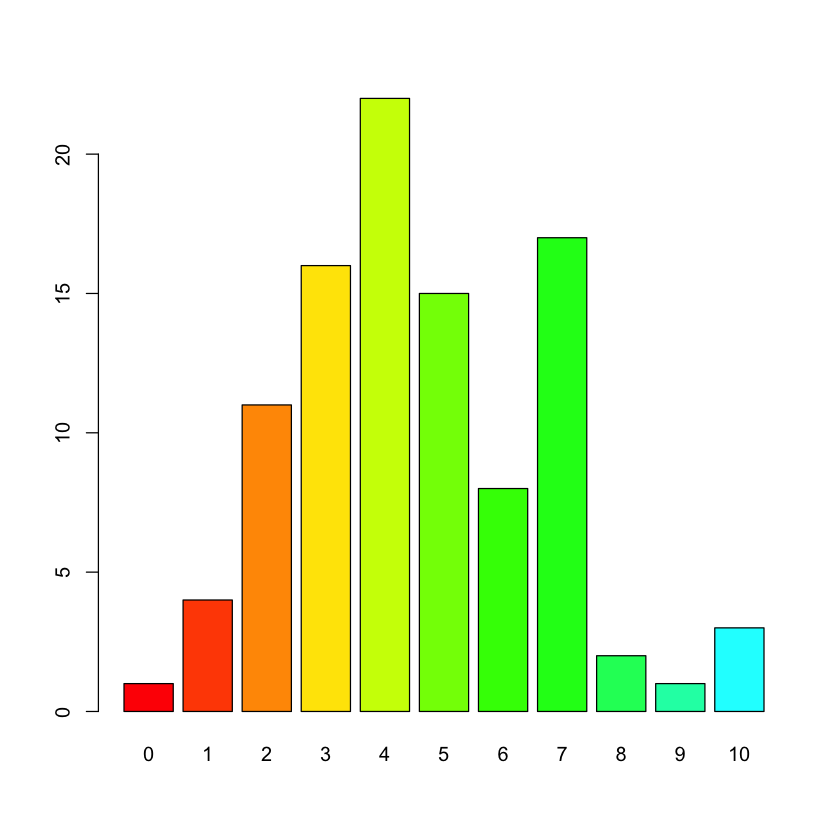

In [3]:
require(grDevices) # for colours
tN <- table(Ni <- stats::rpois(100, lambda = 5))
r <- barplot(tN, col = rainbow(20))

Another example using `ggplot` instead

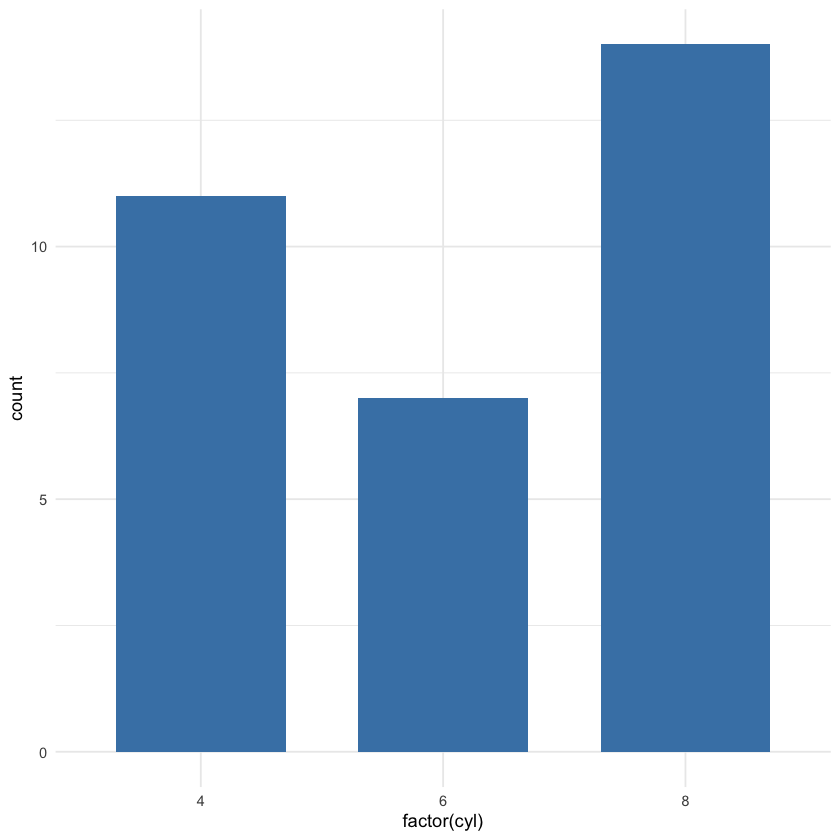

In [9]:
library('ggplot2')
ggplot(mtcars, aes(factor(cyl)))+
  geom_bar(width=0.7, fill="steelblue")+
  theme_minimal()

Below we present a function that can create a barplot analyzing exclusively the count of a single variable, it requires the package `plyr` and `ggplot2` in order to run correctly. Additionally, you must run the code in section 2.6 to make full use of the visualization properties displayed here.

In [20]:
mybarplot01 <- function(dataset,varname,varlabel){
  #' Function that makes a barplot analyzing exclusively the count of a single variable,
  #' The explanation of the fields are as follow
  #'  chr   dataset   <- a data frame with at least one variable, the one to be analyzed 
  #'  chr   varname   <- is the name of the variable of interest as given by str(dataset),
  #'  chr   varlabel  <- is the name of the variable of interest to be displayed as the x axis in the figure 
  mydat <- plyr::count(eval(parse(text = paste0(dataset,'$',varname))))
  if(nrow(mydat)>25){
    warning(paste0('The number of factor is ',nrow(mydat),' and the limit is set to 25 \n
                   if you want to override this setting modify the function by yourself'))
    mydat <- arrange(mydat,desc(freq))
    mydat <- mydat[c(1:10),]
  }
  colnames(mydat)[1] <- c(varname)
  mydat$ncha <- nchar(mydat[,c(1)])
  
  (bar01 <- ggplot(mydat, aes(x = factor(eval(parse(text = varname))),
                              fill=factor(eval(parse(text = varname))), y = freq, label = freq))+
      geom_bar(stat = "identity",width=0.7) +
      geom_text(vjust =1.6, color="white",position =position_dodge(0.9),size=3.5)+
      labs(title = paste0("Frequency of ",varlabel),
           x = varname,
           y = 'Frequency')
  )
  if('TRUE' %in% as.vector(mydat$ncha>14)){
    warning(paste0('The number of characters for the factor variables is larger than 10 so coord_flip is suggested \n
                   it might be better to uncomment part of the last conditional'))
  }
  if(length(unique(eval(parse(text = paste0('mydat$',varname))))) > 9){
    bar01 +theme_Publication()#+ coord_flip()
  }else if(length(unique(eval(parse(text = paste0('mydat$',varname))))) <= 9){
    bar01 +theme_Publication()+scale_fill_Publication()#+coord_flip()
  }
}

such that if we run the script below we can plot this figure 

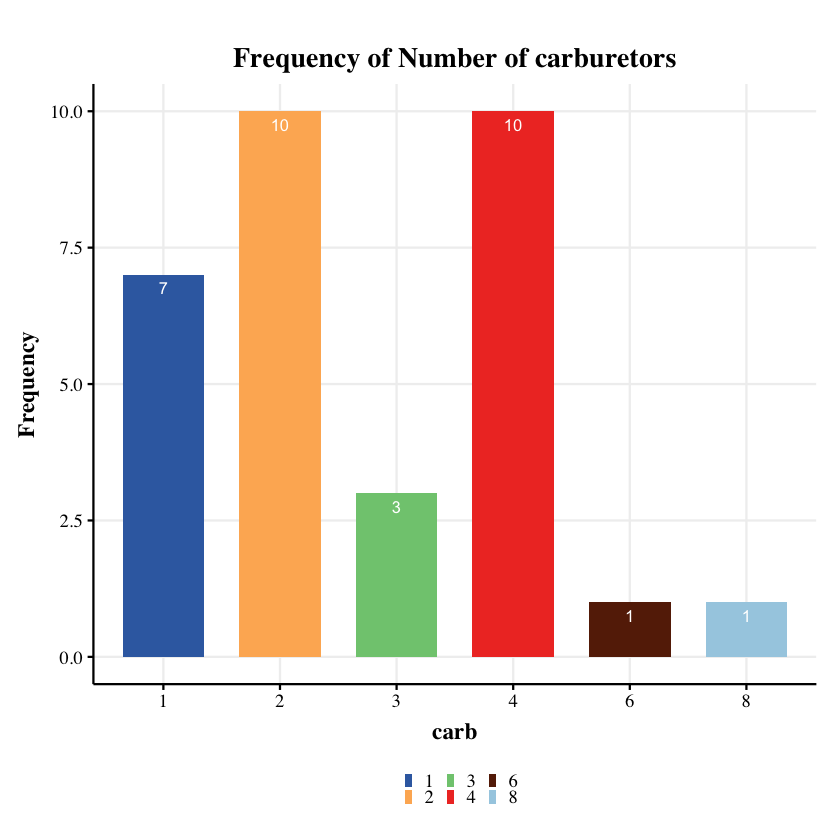

In [21]:
dataset  <- 'mtcars'
varname  <- 'carb'
varlabel <- 'Number of carburetors'
mybarplot01(dataset,varname,varlabel)

### Histogram

In our first approximation to an Univariate Analysis we can begin by making a histogram of the data, together with a fitted Gaussian distribution. A histogram is a figure that plots the counts in the cells defined by breaks; thus the height of a rectangle is proportional to the number of points falling into the cell, as is the area provided the breaks are equally-spaced. Additionally, plots with vertical bars are not histograms.

We will use a dataset on the body mass index (BMI) of Dutch makes between the ages of 0 and 21. Below we present a function that can be used to create a density distribution fitted to a Gaussian curve.

In [6]:
x <- c('plyr','ggplot2','gam','gamlss.data','gamlss') # List of required packages
packages <- as.data.frame(installed.packages())       # List of currently installed packages
for (i in 1:length(x)) {
  if(x[i] %in% packages$Package == TRUE){
    library(x[i],character.only = TRUE)  
  }else if(x[i] %in% packages$Package == FALSE){
    install.packages(as.character(x[i]))
    library(x[i],character.only = TRUE)  
  }
}

In [3]:
mydata <- gamlss.data::dbbmi                         # the included variables are age and Body Mass Index

In [28]:
mycurve01 <- function(dataset,varname,varlabel,breaks_1){
  #' The explanation of the fields are as follow
  #'  chr   dataset   <- a data frame with at least one variable, the one to be analyzed 
  #'  chr   varname   <- is the name of the variable of interest as given by str(dataset) 
  #'  chr   varlabel  <- is the name of the variable of interest to be displayed as the x axis in the figure
  #'     figure_lab   <- is the name of the figure which usually contains " 
  #'        breaks_1  <- it follows the arguments of hist, see 
  
  hist(eval(parse(text = paste0(dataset,'$',varname))), breaks=breaks_1, freq = FALSE, #density=10
             xlab=varlabel, ylim=c(0, 0.20), # 
             main=paste0("Normal curve over histogram of ",varlabel))
  curve(dnorm(x, mean=mean(eval(parse(text = paste0(dataset,'$',varname)))),
                    sd=sd(eval(parse(text = paste0(dataset,'$',varname))))), 
              col="darkblue", lwd=2, add=TRUE, yaxt="n")
}

Such that after running this function one could enter something like `mycurve01('mydata','bmi','BMI',40)` to get a curve like the one displayed below

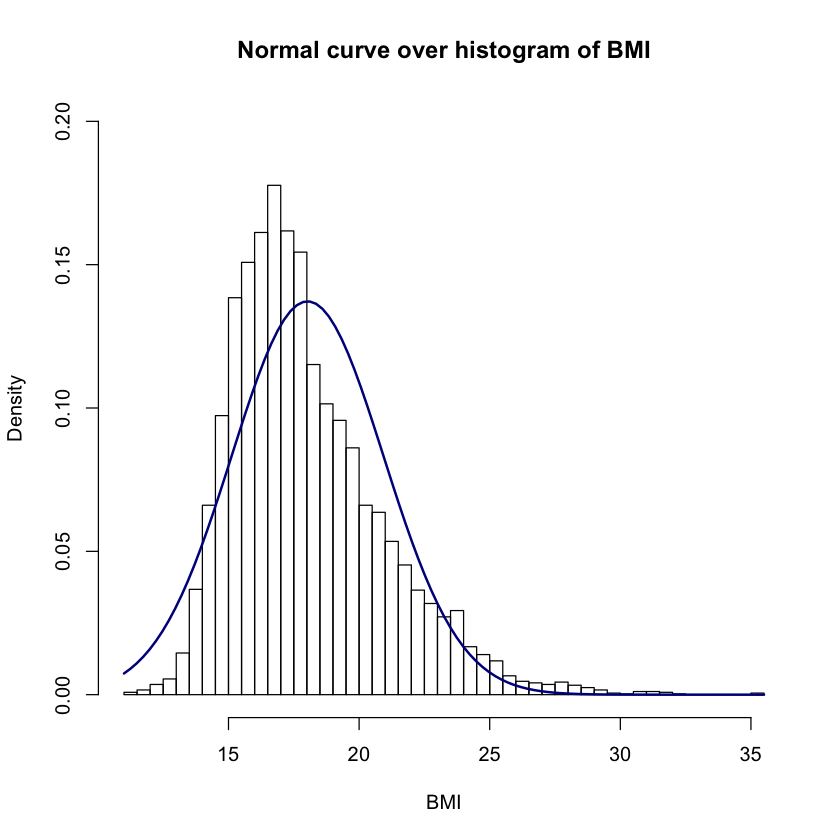

In [29]:
mycurve01('mydata','bmi','BMI',40)

The next example is provided within the documentation of `hist()` but we can make a function out of it just as we did before

In [4]:
mydata1 <- as.data.frame(islands)

In [30]:
mycurve02 <- function(dataset,varname,varlabel){
  #' The explanation of the fields are as follow
  #'  chr   dataset   <- a data frame with at least one variable, the one to be analyzed 
  #'  chr   varname   <- is the name of the variable of interest as given by str(dataset) 
  #'  chr   varlabel  <- is the name of the variable of interest to be displayed as the x axis in the figures
  par(mfrow = c(2, 2))
  # First hist
  hist(eval(parse(text = paste0(dataset,'$',varname))),xlab = varlabel,main = 'Frequency histogram')
  # Second hist
  utils::str(hist(eval(parse(text = paste0(dataset,'$',varname))), col = "gray", labels = TRUE,xlab = varlabel,
                  main = 'With labels on the top'))  
  # Third hist
  hist(sqrt(eval(parse(text = paste0(dataset,'$',varname)))), breaks = 12, col = "lightblue", border = "pink",
       xlab = paste0('square root of ',varlabel), main = 'Bars with colors')
  # Fouth hist
  r <- hist(sqrt(eval(parse(text = paste0(dataset,'$',varname)))), breaks = c(4*0:5, 10*3:5, 70, 100, 140),
            col = "blue1", xlab = paste0('square root of ',varlabel) ,main = 'Non-equidistant breaks')
  text(r$mids, r$density, r$counts, adj = c(.5, -.5), col = "blue3")
  sapply(r[2:3], sum)
  sum(r$density * diff(r$breaks)) # == 1
  lines(r, lty = 3, border = "purple") # -> lines.histogram(*)
  
  par(mfrow = c(1, 1))
  #dev.off()
}

Such that after running this second function one could enter something like `mycurve02('mydata1','islands','area in thousands of miles')` to get a figure like the one displayed below

List of 6
 $ breaks  : num [1:10] 0 2000 4000 6000 8000 10000 12000 14000 16000 18000
 $ counts  : int [1:9] 41 2 1 1 1 1 0 0 1
 $ density : num [1:9] 4.27e-04 2.08e-05 1.04e-05 1.04e-05 1.04e-05 ...
 $ mids    : num [1:9] 1000 3000 5000 7000 9000 11000 13000 15000 17000
 $ xname   : chr "eval(parse(text = paste0(dataset, \"$\", varname)))"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


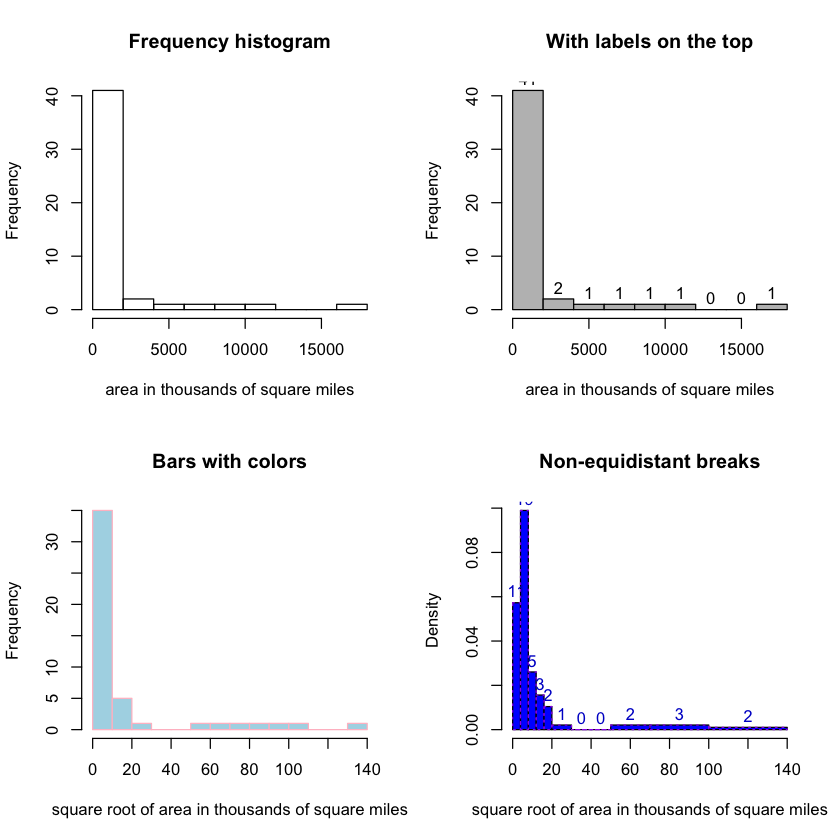

In [31]:
mycurve02('mydata1','islands','area in thousands of square miles')

By last the following function returns a figure with good visualization standards for presentation or publication purposes.

In [9]:
mycurve03 <- function(dataset,varname,varlabel,divisor){ # ,breaks_1
  #' The explanation of the fields are as follow
  #'  chr   dataset   <- a data frame with at least one variable, the one to be analyzed 
  #'  chr   varname   <- is the name of the variable of interest as given by str(dataset) 
  #'  chr   varlabel  <- is the name of the variable of interest to be displayed as the x axis in the figure
  #'  num   divisor   <- is a number to divide the x axis on the figure, if missing default is 1
  if(missing(divisor)){
    divisor <- 1   # change this value in case you want a more broad or small column size
  }
  mini <- floor(min(eval(parse(text = paste0(dataset,'$',varname)))))
  maxi <- ceiling(max(eval(parse(text = paste0(dataset,'$',varname)))))
  (mycurvi <- ggplot(data=eval(parse(text = dataset)), aes(eval(parse(text = paste0(dataset,'$',varname))))) + 
      geom_histogram(aes(y =..density..),
                     breaks = seq(mini,maxi, by = divisor),
                     col="#386cb0",
                     fill="#fdb462",
                     alpha=.2)+
      #geom_density(col=2)+ density function, instead of normal curve as default
      stat_function(fun = dnorm, args = list(mean = mean(eval(parse(text = paste0(dataset,'$',varname)))),
                                             sd = sd(eval(parse(text = paste0(dataset,'$',varname))))))+
      labs(title=paste0("Normal curve over histogram of ",varlabel),x=varlabel)
  ) 
  mycurvi + theme_Publication()+scale_fill_Publication()
}

Remember also to run section 2.6, such that if we call this function we can get the following

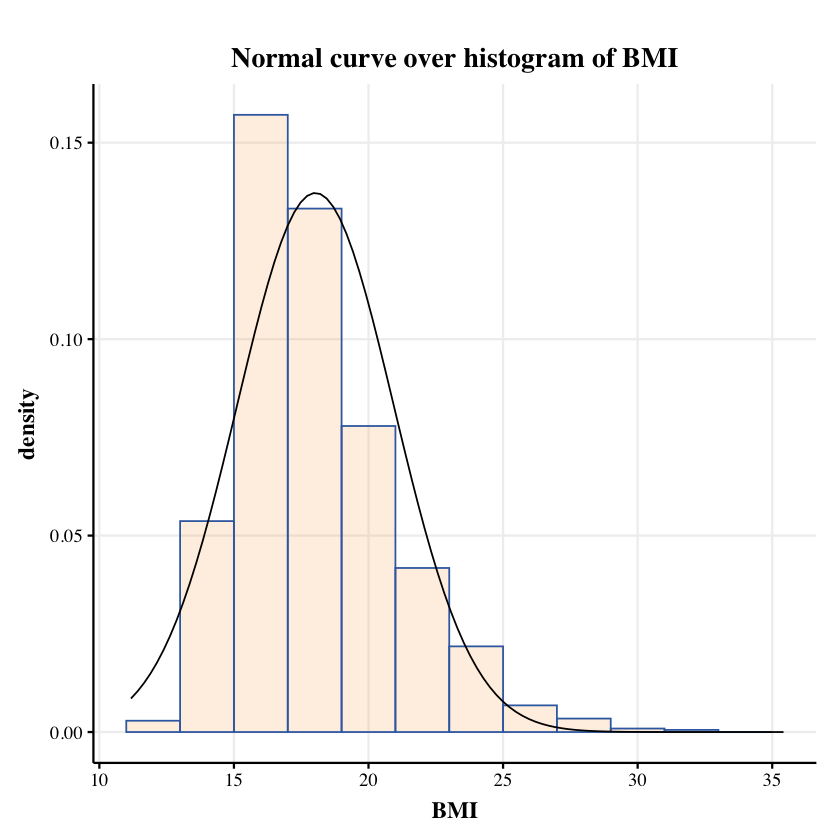

In [10]:
mycurve03('mydata','bmi','BMI',2) # assuming you previously ran the Dutch boys BMI data set in this section

<a id="normality"></a>
## Test of Normality

Here we want to compare data with a model distribution, for such purpose we will use the `qqplot()` function, this produces a quantile-quantile plot of two datasets in which the line represents a theoretical, by default normal, QQ plot which passes through the probs quantiles, by default the first and third quartiles.

In [11]:
require(stats)
set.seed(14)
mychi <- rchisq(100, df = 4)  # generates random data following a chi-square distribution
mychi <- as.data.frame(mychi) # converting mychi into a data frame

In [12]:
mycurve04 <- function(dataset,varname,varlabel,modelo,df){
  #' The explanation of the fields are as follow
  #'  chr   dataset   <- a data frame with at least one variable, the one to be analyzed 
  #'  chr   varname   <- is the name of the variable of interest as given by str(dataset) 
  #'  chr   varlabel  <- is the name of the variable of interest to be displayed as the x axis in the figures
  #'  chr   modelo    <- is the model distribution to be used accepted parameters == 'chi2' 'normal' 
  #'  num   df        <- the degress of freedom used in the chi distribution
  lim_density <- 0.20   # This is the limit of the density distribution, the value depends on the data
  par(mfrow = c(1, 2))
  if(modelo == 'chi2'){
    qqplot(eval(parse(text = paste0(dataset,'$',varname))), qchisq(ppoints(eval(parse(text = paste0(dataset,'$',varname)))),df = df), # 
           xlab = paste0('Theoretical Quantiles of ',varlabel),ylab = paste0('Sample Quantiles of ',varlabel),main = 'Normal Q-Q Plot')
    abline(0, 1, col = 2, lty = 2)
    hist(eval(parse(text = paste0(dataset,'$',varname))), freq = FALSE, ylim = c(0,lim_density),xlab=varlabel,
         main = paste0('Density distribution over histogram of ',varlabel))
    # Density of a chi-squared distribution
    curve(dchisq(x, df = 4), col = "darkblue", lty = 2, lwd = 2, add = TRUE)
  }else if(modelo == 'normal'){
    probs <- c(0.25, 0.75);x1 <- qnorm(probs[1]);x2 <- qnorm(probs[2])
    y1 <- quantile(eval(parse(text = paste0(dataset,'$',varname))), probs[1])
    y2 <- quantile(eval(parse(text = paste0(dataset,'$',varname))), probs[2])
    qqnorm(eval(parse(text = paste0(dataset,'$',varname))), 
           xlab = paste0('Theoretical Quantiles of ',varlabel),ylab = paste0('Sample Quantiles of ',varlabel),
           main = 'Normal Q-Q Plot')
    segments(x1, y1, x2, y2, col = "red", lwd = 2)
    qqline(eval(parse(text = paste0(dataset,'$',varname))), lty = 2) 
    hist(eval(parse(text = paste0(dataset,'$',varname))), freq = FALSE, ylim = c(0,lim_density),xlab=varlabel,
         main = paste0('Density distribution over histogram of ',varlabel))
    # Density of a normal distribution
    curve(dnorm(x, mean=mean(eval(parse(text = paste0(dataset,'$',varname)))),
                sd=sd(eval(parse(text = paste0(dataset,'$',varname))))), 
          col="darkblue", lty = 2, lwd = 2, add = TRUE, yaxt="n")
  }
  par(mfrow = c(1, 1))
  #dev.off()
}

Such that after running the function above one could enter something like `mycurve03('mychi','mychi','x','chi2')` to get a figure like the one displayed below.

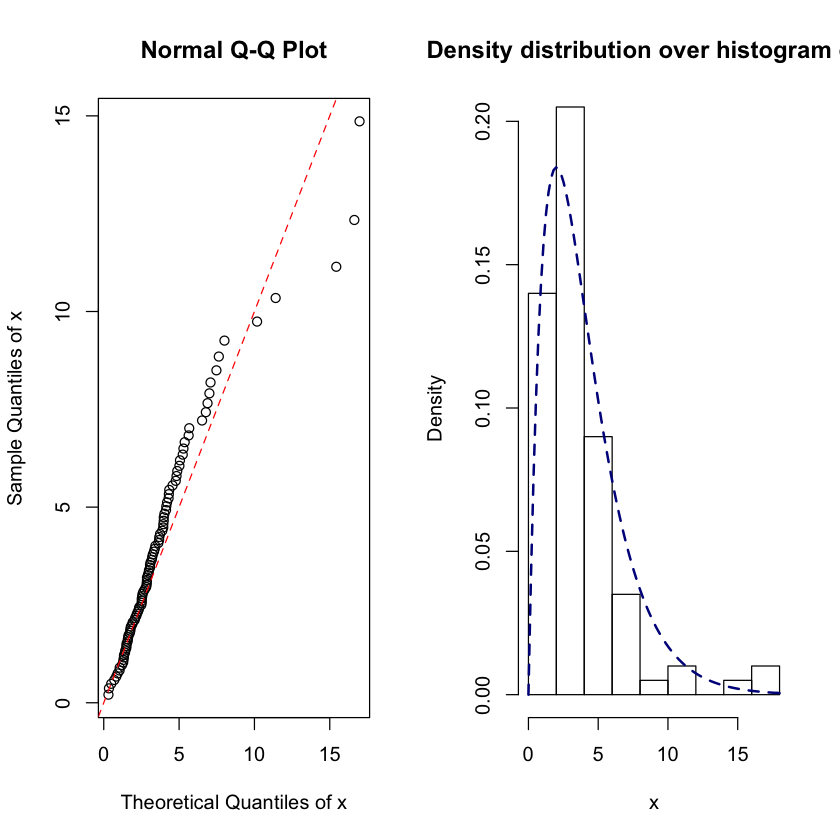

In [13]:
mycurve04('mychi','mychi','x','chi2',4)

Or test the normality of one of our previous dataset by calling the function with different parameters, testing the hypothesis that the distribution will be normal in shape

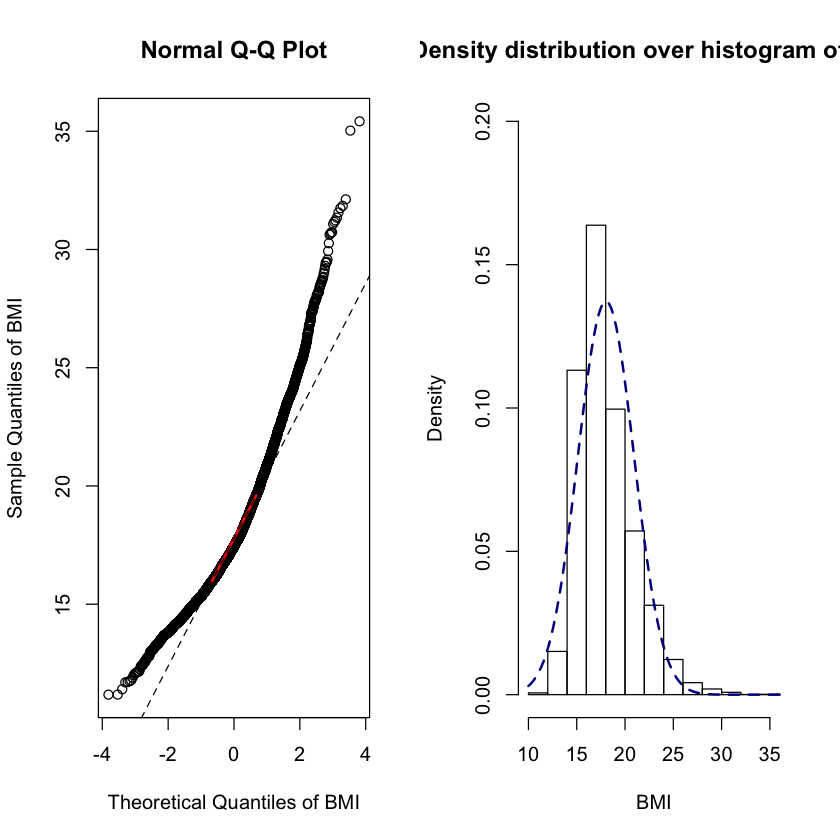

In [26]:
mycurve04('mydata','bmi','BMI','normal')

The following example uses a data set from the `psych` package which is worth exploring

Loading required package: psych

Attaching package: ‘psych’

The following object is masked from ‘package:gamlss’:

    cs

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



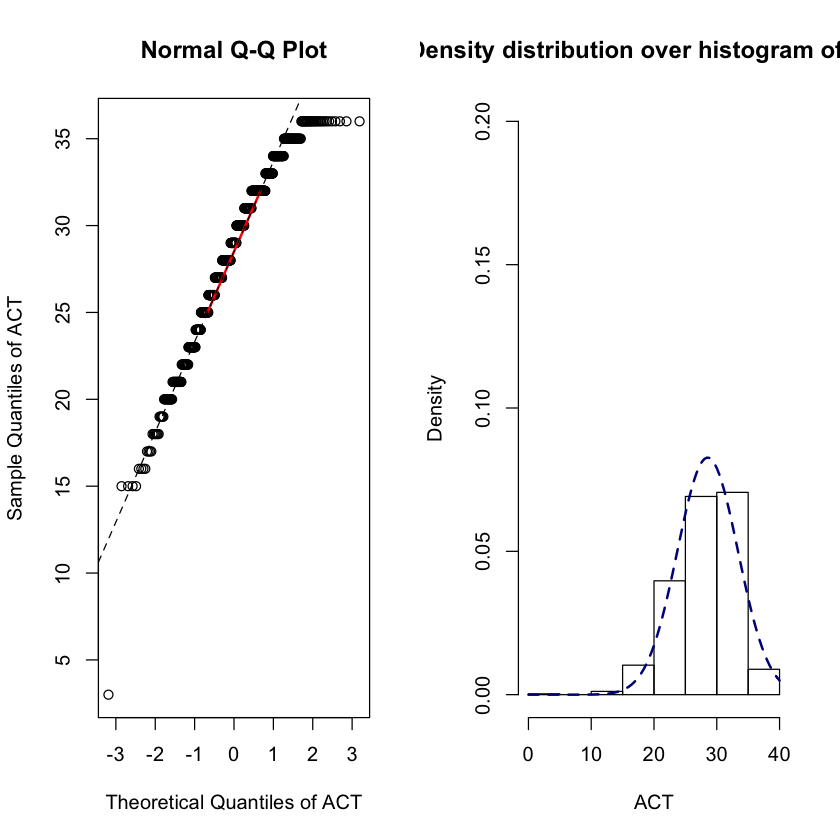

In [27]:
require(psych)
db<-sat.act
mycurve04('db','ACT','ACT','normal')

The last example discussed in this section is the one in which we want to perform a series of QQ plots for all of the variables within a data set, this can be done as follows

In [ ]:
require(HSAUR2)
sapply(colnames(USairpollution),function(x){
  qqnorm(USairpollution[[x]], main = x)
  qqline(USairpollution[[x]])
})

4. [BIVARIATE STATISTICS](#multista)

<a id="multista"></a>
# Bivariate Statistics

## Descriptive Statistics

When dealing with two variables the descriptive statistics usually assess the relationships between these variables

### Barplots

As explained before in the Univariate Statistics section the basic creation of barplots in the `R` environment can be done with the `barplot()` function. In this case we will explore two variables at the time as in the next example

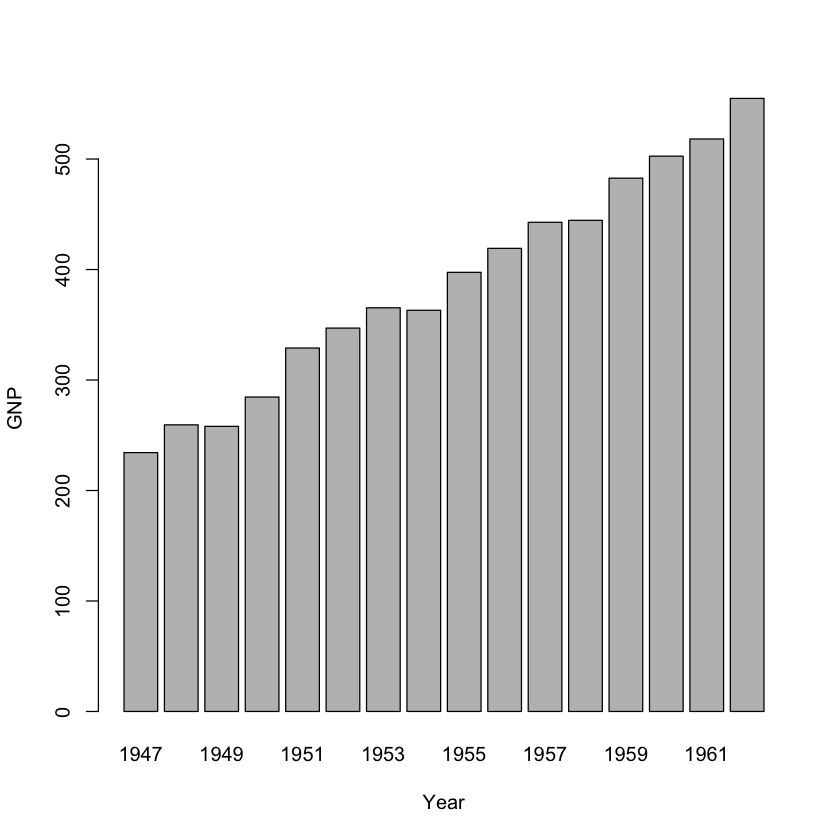

In [1]:
barplot(GNP ~ Year, data = longley) # GNP is displayed as the y axis and Year in the x axis

In [ ]:
barplot(cbind(Employed, Unemployed) ~ Year, data = longley)

In [ ]:
op <- par(mfrow = 2:1, mgp = c(3,1,0)/2, mar = .1+c(3,3:1))
summary(d.Titanic <- as.data.frame(Titanic))
barplot(Freq ~ Class + Survived, data = d.Titanic,
        subset = Age == "Adult" & Sex == "Male",
        main = "barplot(Freq ~ Class + Survived, *)", ylab = "# {passengers}", legend = TRUE)
(xt <- xtabs(Freq ~ Survived + Class + Sex, d.Titanic, subset = Age=="Adult"))
# Alternatively a Mosaic plot
mosaicplot(xt[,,"Male"], main = "mosaicplot(Freq ~ Class + Survived, *)", color=TRUE)
par(op)

Another example using the matrix _Death Rates in Virginia_

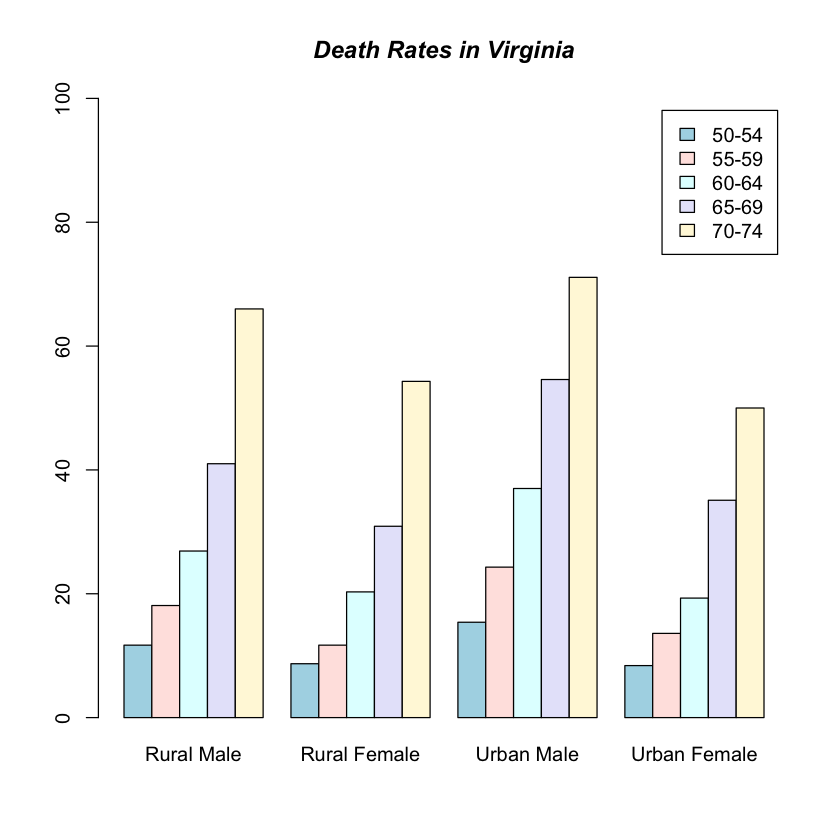

In [4]:
barplot(VADeaths, beside = TRUE,
        col = c("lightblue", "mistyrose", "lightcyan",
                "lavender", "cornsilk"),
        legend = rownames(VADeaths), ylim = c(0, 100))
title(main = "Death Rates in Virginia", font.main = 4)

### Scatterplots

Scatterplots are a frequent method to determine whether two variables are anyhow related. For analyzing this we are going to use the data set previously used on the Body Mass Index of Dutch boys and we will evidence the relationship between *age* and *BMI*. Below is the function with enhancement visualization, meaning that you have to run the code in section 2.6 for running it properly.

In [17]:
myscatter01 <- function(dataset,varname,varname2,varlabel,varlabel2,pointsz){
  #' The explanation of the fields are as follow
  #'  chr   dataset   <- a data frame with at least one variable, the one to be analyzed 
  #'  chr   varname   <- is the name of the 1rs variable of interest as given by str(dataset) 
  #'  chr   varname2  <- is the name of the 2nd variable of interest as given by str(dataset) 
  #'  chr   varlabel  <- is the name of the variable of interest to be displayed as the y axis in the figure
  #'  chr   varlabel2 <- is the name of the variable of interest to be displayed as the x axis in the figure
  #'  num   pointsz   <- is a number indicating the size of points, if missing default is 1
  maxi <- ceiling(max(eval(parse(text = paste0(dataset,'$',varname2)))))
  if(missing(pointsz)){
    pointsz <- 0.5   # change this value in case you want a larger or smaller point size
  }
  (myscat <- ggplot(data=eval(parse(text = dataset)), aes(x=eval(parse(text = varname2)),
                                                          y=eval(parse(text = varname)))) + 
      geom_point(alpha = pointsz) +
      geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) + 
      stat_summary_bin(fun.y='median', bins=maxi,    # optionally it can represent the median by changing fun.y to "median" or the mean with "mean"
                       color='orange', size=pointsz*4, geom='point') + # the orange dots represent the median, change geom='line' if desired
      labs(title=paste0("Scatterplot of ",varlabel," and ",varlabel2),x=varlabel2,y=varlabel)
  )
  myscat + theme_Publication()+scale_fill_Publication()
}

Such that we run the following script we get the figure below. This figure displays the scatterplot of age and BMI and the orange dots are the mean in a given age interval

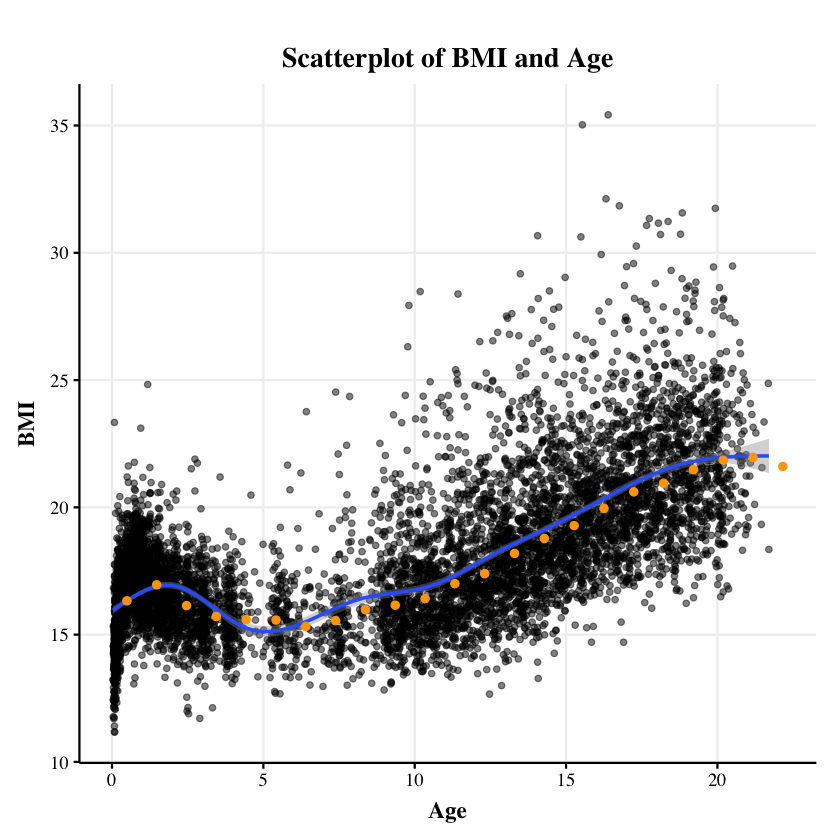

In [18]:
mydata1 <- gamlss.data::dbbmi # the Dutch boys body mass data
dataset   <- 'mydata1'
varname   <- 'bmi'
varname2  <- 'age' 
varlabel  <- 'BMI'
varlabel2 <- 'Age'
myscatter01(dataset,varname,varname2,varlabel,varlabel2)

5. [MULTIVARIATE STATISTICS](#multista)

<a id="multista"></a>
# Multivariate Statistics

## Descriptive Statistics

### Barplot

  Class       Sex        Age     Survived      Freq       
 1st :8   Male  :16   Child:16   No :16   Min.   :  0.00  
 2nd :8   Female:16   Adult:16   Yes:16   1st Qu.:  0.75  
 3rd :8                                   Median : 13.50  
 Crew:8                                   Mean   : 68.78  
                                          3rd Qu.: 77.00  
                                          Max.   :670.00  

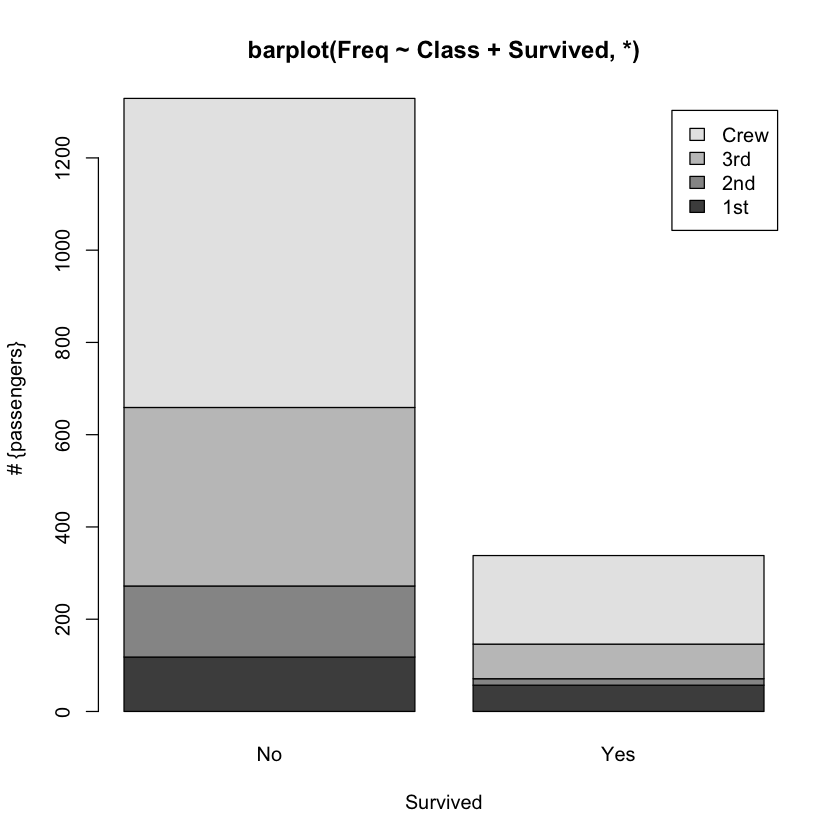